## **Image Augmentation code using AugLy**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
### Check file counts (ORIGINAL IMAGES)

import pandas as pd
from os import walk

dir = "/content/drive/My Drive/Colab Notebooks/Capstone/testing/train_images/Outdoor_Living"
_, dirs, _ = next(walk(dir))
folder_list = []
for folder in dirs:
    folder_path = '{}/{}'.format(dir, folder)
    _, _, file_names = next(walk(folder_path))
    folder_list.append(len(file_names))

df_folders = pd.DataFrame({'folder_name':dirs, 'files_count': folder_list})
total_files = df_folders['files_count'].sum()
total_files_desired = 100
df_folders['completion'] = df_folders['files_count'].apply(lambda x: total_files_desired-x)
df_folders.sort_values("completion", ascending=False)
df_folders

,folder_name,files_count,completion
0,WATERING CANS,18,82
1,OUTDOOR HEATING,49,51
2,SKATEBOARDS AND SCOOTERS,62,38
3,SOFT COOLERS,60,40
4,SNOWBLOWERS,50,50
5,POTS AND PLANTERS,84,16
6,WATER TIMERS,23,77
7,POOLS,76,24
8,PATIO CUSHIONS AND SEAT PADS,63,37
9,INFLATABLE BOUNCERS,29,71


In [2]:
# # Note: restart runtime after this import before running the augmentations
# !pip install -U augly
# !sudo apt-get install python3-magic

# Augly functions
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

def scale(image, output_path):
  return imaugs.scale(image, factor=0.2, output_path = output_path)

def saturate(image, output_path):
  return imaugs.saturation(image, factor=1.5, output_path = output_path)

def shuffle(image, output_path):
  return imaugs.shuffle_pixels(image, factor=0.3, output_path = output_path)

def pixelization(image, output_path):
  return imaugs.pixelization(image, ratio=0.09, output_path = output_path)

def rotate(image, output_path):
  return imaugs.rotate(image, degrees=random.randint(0,180), output_path = output_path)

def blur(image, output_path):
  return imaugs.blur(image, radius=5, output_path = output_path)

def car(image, output_path):
  return imaugs.change_aspect_ratio(image, ratio=random.randint(1,8), output_path = output_path)

def sharpen(image, output_path):
  return imaugs.sharpen(image, factor=random.randint(1,8), output_path = output_path)

def pt(image, output_path):
  return imaugs.perspective_transform(image, sigma=random.randint(20, 50), output_path = output_path)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
from augly.image import aug_np_wrapper

transformations = {'scale': scale,
                   'saturate': saturate,
                   'shuffle': shuffle,
                   'pixelization': pixelization,
                   'rotate': rotate,
                   'blur': blur,
                   'car': car,
                   'sharpen': sharpen,
                   'perspective_transform':pt}

category = 'Outdoor_Living'
cat_d = df_folders['folder_name']
cat_n = df_folders['completion']

# for i in range(len(cat_d)):
for i in range(0, 1):
    images_path = f"/content/drive/My Drive/Colab Notebooks/Capstone/testing/train_images/{category}/{cat_d[i]}" #path to original images
    augmented_path = f"/content/drive/My Drive/Colab Notebooks/Capstone/testing/train_images/Augmented/{cat_d[i]}" # path to store aumented images
    images=[]
    os.makedirs(augmented_path, exist_ok=True) # create directory if not existing

    for im in os.listdir(images_path):      
      images.append(os.path.join(images_path,im))
    
    for j in range(0, cat_n[i]):
      image = random.choice(images)
      original_image = Image.open(image)
      transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
            
      for n in range(0, transformation_count):
        t_key = random.choice(list(transformations)) #randomly choosing method to call
        output_path= "%s/%s_A%s.jpg" %(augmented_path, cat_d[i], j)
        transformations[t_key](original_image, output_path) 

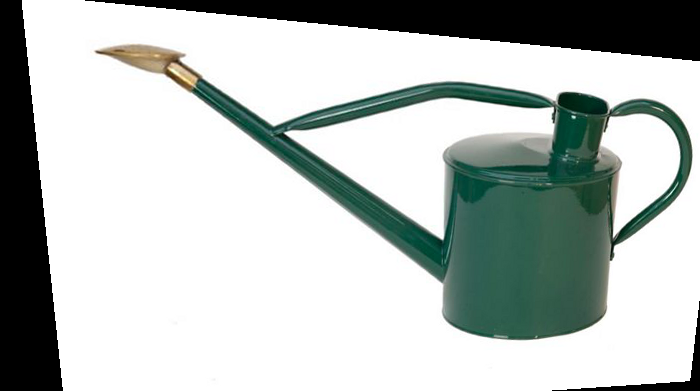

In [94]:
def pt(image, output_path):
  return imaugs.perspective_transform(image, sigma=random.randint(20, 50), output_path = output_path)

pt(original_image, output_path)